XML, JSON - используется для передачи данных

In [1]:
import json

In [4]:
class Tournament:
    
    def __init__(self, name, year):
        self.name = name
        self.year = year

In [9]:
tournaments = {
    'New cAp': 2010,
    'New age': 2017, 
    'Vector eq': 2016
}

json_data = json.dumps(tournaments, indent = 2)# Serialization
print(json_data)

loaded = json.loads(json_data)# Deserialization
print(type(loaded))
print(loaded)

{
  "New cAp": 2010,
  "New age": 2017,
  "Vector eq": 2016
}
<class 'dict'>
{'New cAp': 2010, 'New age': 2017, 'Vector eq': 2016}


In [11]:
t1 = Tournament('New cap',1234)
json_data = json.dumps(t1)

TypeError: Object of type Tournament is not JSON serializable

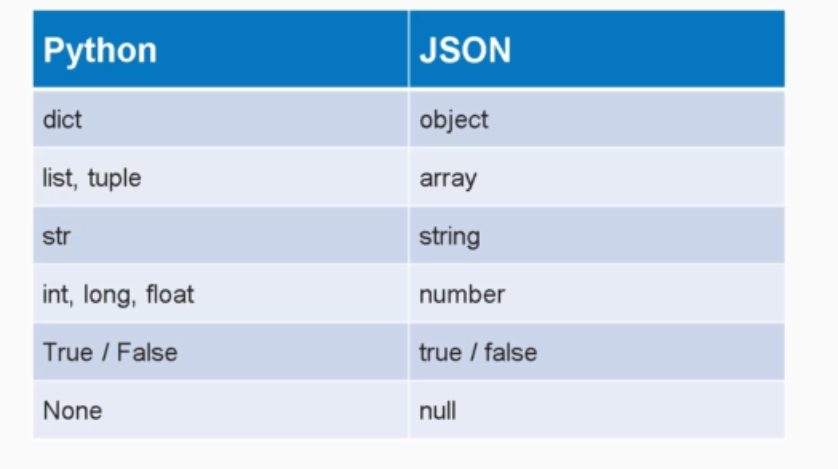

In [12]:
json_data = json.dumps(t1.__dict__)

In [13]:
print(json_data)

{"name": "New cap", "year": 1234}


In [14]:
t = Tournament(**json.loads(json_data))

In [18]:
print(f'name={t.name}, year={t.year}')

name=New cap, year=1234


In [19]:
class ChessPlayer:
    
    def __init__(self, tournaments):
        self.tournaments = tournaments
        

In [21]:
t1 = Tournament("New cAp",2010 )
t2 = Tournament("New age",2017 )
t3 = Tournament("Vector eq",2016 )

p1 = ChessPlayer([t1,t2,t3])

In [22]:
p1

In [25]:
json_data=json.dumps(p1.__dict__, default = lambda obj: obj.__dict__)
print(json_data)

{"tournaments": [{"name": "New cAp", "year": 2010}, {"name": "New age", "year": 2017}, {"name": "Vector eq", "year": 2016}]}


In [26]:
decoded_player = ChessPlayer(**json.loads(json_data))
print(decoded_player)

In [29]:
player_tournament = decoded_player.tournaments[0]
print(type(player_tournament))
print(player_tournament)

<class 'dict'>
{'name': 'New cAp', 'year': 2010}


In [4]:
class Tournament:
    
    def __init__(self, name, year):
        self.name = name
        self.year = year
    
    @classmethod
    def from_json(cls, json_data):
        return cls(**json_data)
    
class ChessPlayer:
    
    def __init__(self, tournaments):
        self.tournaments = tournaments
    
    @classmethod
    def from_json(cls, json_data):
        tournaments = list(map(Tournament.from_json, json_data["tournaments"]))
        return cls(tournaments) 
                                                            

In [5]:
t1 = Tournament("New cAp",2010 )
t2 = Tournament("New age",2017 )
t3 = Tournament("Vector eq",2016 )

p1 = ChessPlayer([t1,t2,t3])

In [36]:
json_data=json.dumps(p1.__dict__, default = lambda obj: obj.__dict__, indent = 4, sort_keys=True)
print(type(json_data))
print(json_data)

decoded_player = ChessPlayer.from_json(json.loads(json_data))
print(decoded_player)
print(decoded_player.tournaments)

<class 'str'>
{
    "tournaments": [
        {
            "name": "New cAp",
            "year": 2010
        },
        {
            "name": "New age",
            "year": 2017
        },
        {
            "name": "Vector eq",
            "year": 2016
        }
    ]
}
[<__main__.Tournament object at 0x0000000006E8C438>, <__main__.Tournament object at 0x0000000006E8C208>, <__main__.Tournament object at 0x0000000006E8C198>]


In [6]:
import json
with open("player.json", "w") as file:
    json.dump(p1, file, default= lambda obj: obj.__dict__)

with open("player.json", "r") as read_file:
    data = json.load(read_file)

print(data)

{'tournaments': [{'name': 'New cAp', 'year': 2010}, {'name': 'New age', 'year': 2017}, {'name': 'Vector eq', 'year': 2016}]}


In [7]:
decoded_player = ChessPlayer.from_json(data)
print(decoded_player)
print(decoded_player.tournaments)

[<__main__.Tournament object at 0x0000000004F04710>, <__main__.Tournament object at 0x0000000004F04FD0>, <__main__.Tournament object at 0x0000000004F04278>]
